# Memory task initial data exploration
## Matt Oberhardt



### Imports & API calls:

In [1]:
import synapseclient
from synapseclient import Project, Folder, File
import pandas as pd
import json
import pickle
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
%load_ext autoreload
%matplotlib inline  
# from pandas import DataFrame, Series


In [2]:
import memorytools as mt

### Load up the memory & demographic data:

In [3]:
# initialize environment:
synuser = os.environ['SYNAPSE_USER']
synpass = os.environ['SYNAPSE_PASS']
mt.loadSynapseRecordsFromScratch = False
syn, memory, memorysyn, filePaths, demographics, demosyn, data = mt.create_memory_environment(synuser, synpass)
data = mt.filter_data_for_popular_phones(data)


Welcome, Matthew Oberhardt!
(phones are now filtered for only the most popular ones)


In [4]:
# pull out features from games:
fromFile = True#False
toSave = False#True
data = mt.add_memory_game_features_to_data(filePaths, data, fromFile = fromFile, toSave=toSave, outFileName='memory_data_with_features.p')


memory features loaded from file: memory_data_with_features.p (input data was ignored)


### Visualize the memory data:

#### Columns:

In [5]:
# columns:
for col in data.columns:
    print col

recordId
healthCode
createdOn
appVersion
phoneInfo
game_score
game_numGames
game_numFails
game_startDate
game_endDate
game_records
medTimepoint
game_records_txt
recordId_demographic
createdOn_demographic
appVersion_demographic
phoneInfo_demographic
age
isCaretaker
brainStim
diagYear
education
employment
gender
healthHistory
healthcareProvider
homeUsage
lastSmoked
maritalStatus
medicalUsage
medicalUsageYesterday
medicationStartYear
onsetYear
packsPerDay
pastParticipation
phoneUsage
professionalDiagnosis
race
smartphone
smoked
surgery
videoUsage
yearsSmoking
hasParkinsons
gamesdata
16_latency
16_gamescore
16_successful
16_meanDt
16_meandist
16_gamesize
16_meanunsuccessfuldist
16_meansuccessfuldist
16_numunsuccesses
16_numsuccesses
16_firstdist
9_latency
9_gamescore
9_successful
9_meanDt
9_meandist
9_gamesize
9_meanunsuccessfuldist
9_meansuccessfuldist
9_numunsuccesses
9_numsuccesses
9_firstdist
4_latency
4_gamescore
4_successful
4_meanDt
4_meandist
4_gamesize
4_meanunsuccessfuldist
4_mea

In [26]:
# How many nans in each column?
numnulls = data.isnull().sum()
pd.set_option('display.max_rows', len(numnulls))
numnulls.sort_values(inplace=True, ascending=True)
print 'Number of nulls per column:\n'
print numnulls


Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

In [7]:
data[['16_meansuccessfuldist','16_meanunsuccessfuldist']]

,16_meansuccessfuldist,16_meanunsuccessfuldist
0,16.358862,NaN
1,17.521532,20.084539
2,9.336439,12.500000
3,12.941889,7.158911
4,11.392725,5.700877
5,11.614178,9.154410
6,10.712571,10.793517
7,13.505196,8.697732
8,9.769258,1.581139
9,12.523051,8.678291


In [8]:
# look at one record where meansuccessfuldist > meanunsuccessfuldist -- that is wierd (might be a bug)
rowidx = 7944
print data['recordId'][rowidx]
games = data['gamesdata'][rowidx]['games_by_sizes']
games
#data['recordId'][rowidx]
# problem here... 

e5c2a729-d053-40eb-8a5f-2bef8515a8f6


{4: [],
 9: [{u'MemoryGameRecordGameScore': 45,
   u'MemoryGameRecordGameSize': 9,
   u'MemoryGameRecordSeed': 597123000,
   u'MemoryGameRecordSequence': [4, 5, 2],
   u'MemoryGameRecordTargetRects': [u'{{36, 199}, {114, 114}}',
    u'{{36, 313}, {114, 114}}',
    u'{{36, 427}, {114, 114}}',
    u'{{150, 199}, {114, 114}}',
    u'{{150, 313}, {114, 114}}',
    u'{{150, 427}, {114, 114}}',
    u'{{264, 199}, {114, 114}}',
    u'{{264, 313}, {114, 114}}',
    u'{{264, 427}, {114, 114}}'],
   u'MemoryGameRecordTouchSamples': [{u'MemoryGameTouchSampleIsCorrect': True,
     u'MemoryGameTouchSampleLocation': u'{207.66667175292969, 376.33334350585938}',
     u'MemoryGameTouchSampleTargetIndex': 4,
     u'MemoryGameTouchSampleTimestamp': 0.8492842083214782},
    {u'MemoryGameTouchSampleIsCorrect': True,
     u'MemoryGameTouchSampleLocation': u'{219.66667175292969, 493.66668701171875}',
     u'MemoryGameTouchSampleTargetIndex': 5,
     u'MemoryGameTouchSampleTimestamp': 1.249212541675661},
    

In [9]:
games16 = games[16]
avg_memory_features = mt.average_features_from_memory_games(games16)

#memory_features = mt.pull_features_from_memory_game(game)
#memory_features

%autoreload 2
avg_memory_features
## It seems that the MemoryGameTouchSampleIsCorrect field is WRONG here!?, for the 1st result from game 16.

all memory features: {'latency': [0.7851849166909233, 0.563689999980852], 'gamescore': [15, 75], 'successful': [False, True], 'meanDt': [0.76660268750856631, 0.47497498958546203], 'meandist': [9.6872664794558148, 10.192365369093453], 'gamesize': [16, 16], 'meanunsuccessfuldist': [4.11637248483592, nan], 'meansuccessfuldist': [12.472713476765762, 10.192365369093453], 'numunsuccesses': [1, 0], 'numsuccesses': [2, 5], 'firstdist': [7.8492847114109221, 9.419242214123237]}


/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


{'firstdist': 8.6342634627670805,
 'gamescore': 45.0,
 'gamesize': 16.0,
 'latency': 0.67443745833588764,
 'meanDt': 0.62078883854701417,
 'meandist': 9.9398159242746331,
 'meansuccessfuldist': 11.332539422929607,
 'meanunsuccessfuldist': 4.11637248483592,
 'numsuccesses': 3.5,
 'numunsuccesses': 0.5,
 'successful': 0.5}

# Machine learning

### Imports & API calls:

In [10]:
from sklearn import linear_model
import sklearn
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import numpy as np
from sklearn.utils.validation import check_consistent_length, _num_samples
import sklearn.preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Pick & process features, 1st logistic regression:

In [22]:
##### define features:

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()


Features converted to numbers: smartphone, education, gender, phoneUsage, phoneInfo
training accuracy: 0.888564654386
test accuracy: 0.881327094853


phoneUsage      -0.726648
gender          -0.535846
education       -0.091916
game_score       0.030728
game_numFails    0.104056
phoneInfo        0.126661
age              1.523501
smartphone       1.527187
dtype: float64


### Add memory features to model, & redo logistic regression

In [28]:
# How many nans in each column?
numnulls = data.isnull().sum()
pd.set_option('display.max_rows', len(numnulls))
numnulls.sort_values(inplace=True, ascending=True)
print 'Number of nulls per column:\n'
print numnulls

Number of nulls per column:

recordId                      0
phoneInfo_demographic         0
appVersion_demographic        0
createdOn_demographic         0
gamesdata                     0
game_records_txt              0
game_records                  0
game_endDate                  0
recordId_demographic          0
game_numFails                 0
game_startDate                0
healthCode                    0
createdOn                     0
appVersion                    0
hasParkinsons                 0
game_score                    0
game_numGames                 0
phoneInfo                     0
9_numsuccesses                2
9_numunsuccesses              2
9_gamesize                    2
9_meandist                    2
9_successful                  2
9_gamescore                   2
9_latency                     2
9_firstdist                   2
medTimepoint                  4
smartphone                    5
gender                        5
phoneUsage                    6
9_meanDt   

In [35]:
##### define features:
gamefeatures = ['9_numsuccesses', '9_numunsuccesses',
                '9_gamesize', '9_meandist', '9_successful',
                '9_gamescore', '9_latency', '9_firstdist']

features = ["game_score","age","game_numFails", "phoneInfo",
    "education", "gender", "phoneUsage", "smartphone", "hasParkinsons"]
features = gamefeatures + features
features


['9_numsuccesses',
 '9_numunsuccesses',
 '9_gamesize',
 '9_meandist',
 '9_successful',
 '9_gamescore',
 '9_latency',
 '9_firstdist',
 'game_score',
 'age',
 'game_numFails',
 'phoneInfo',
 'education',
 'gender',
 'phoneUsage',
 'smartphone',
 'hasParkinsons']

In [36]:
# transform features, etc.
features_df = data[features]

features_df = mt.convert_features_to_numbers(features_df)
features_df = mt.move_col_to_end_of_df(features_df, 'hasParkinsons')

# do more processing here, in case of features with lots of nas

# drop na rows:
features_df = features_df.dropna()

# convert to matrices for machine learning:
labelcol = 'hasParkinsons'
X, y, X_names, y_name = mt.convert_features_df_to_X_and_y_for_machinelearning(features_df, labelcol)
    
###### perform logistic regression

# do cross validation manually:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# scale features:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# create logistic regression model:
lr = LogisticRegression(C=1000.0, random_state=0)##
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
lr.fit(X_train_std, y_train)


###### assess regression performance:
lr.coef_
lr.intercept_ # this is the 0 coeff?
lr.fit(X_train_std, y_train)
print 'training accuracy:', lr.score(X_train_std, y_train)
print 'test accuracy:', lr.score(X_test_std, y_test) # suspiciously high..
lr.intercept_
lr.coef_ # only using 4 features.. which ones?
# mt.plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(len(X_train_std),len(X_combined_std)+1))
X_names_heavy = X_names[np.where(np.abs(lr.coef_) > 0.1)[1]]
Scoef = mt.convert_regression_coefs_to_pdSeries(lr.coef_, X_names)

print '\n'
print Scoef.sort_values()

Features converted to numbers: smartphone, education, gender, phoneUsage, phoneInfo
training accuracy: 0.891645384896
test accuracy: 0.891489361702


9_gamescore        -0.925850
phoneUsage         -0.750180
gender             -0.584945
9_latency          -0.172239
education          -0.090453
game_score         -0.041914
9_gamesize          0.000000
game_numFails       0.041078
phoneInfo           0.059917
9_firstdist         0.121477
9_meandist          0.487042
9_numsuccesses      0.589335
9_numunsuccesses    1.111960
9_successful        1.447958
smartphone          1.449737
age                 1.519702
dtype: float64


array([False,  True], dtype=bool)

### look at coefficients, check why some are working too well..

phoneInfo
game_score
game_numFails
age
education
employment
gender
maritalStatus
phoneUsage
smartphone
hasParkinsons


In [6]:
data[features].head(3)

,game_score,age,game_numFails,phoneInfo,education,employment,gender,maritalStatus,phoneUsage,smartphone,hasParkinsons
0,400,43,0,iPhone 6 Plus,4-year college degree,Employment for wages,Male,Married or domestic partnership,true,Very easy,False
1,285,43,1,iPhone 6 Plus,4-year college degree,Employment for wages,Male,Married or domestic partnership,true,Very easy,False
2,260,73,1,iPhone 6,Master's Degree,Retired,Male,Married or domestic partnership,true,Very easy,False


In [7]:
data[features].describe()

,game_score,age,game_numFails,hasParkinsons
count,7981.000000,7966.000000,7981.000000,7981
mean,261.678988,61.540673,1.326651,0.784739
std,59.984544,13.772669,0.581182,0.411029
min,0.000000,18.000000,0.000000,False
25%,225.000000,59.000000,1.000000,1
50%,260.000000,65.000000,1.000000,1
75%,300.000000,70.000000,2.000000,1
max,400.000000,90.000000,4.000000,True


In [10]:
data.head(3)

,recordId,healthCode,createdOn,appVersion,phoneInfo,game_score,game_numGames,game_numFails,game_startDate,game_endDate,...,pastParticipation,phoneUsage,professionalDiagnosis,race,smartphone,smoked,surgery,videoUsage,yearsSmoking,hasParkinsons
0,5a0b4204-8a6c-430f-be93-c5aa2d6c9e33,46f5740b-afa0-4432-94a4-4155ae963b75,1429652895000,"version 1.0.5, build 12",iPhone 6 Plus,400,5,0,1429652844000,1429652895000,...,False,true,False,"""Latino/Hispanic""",Very easy,False,False,True,NaN,False
1,0d313fd2-d798-4d09-8c21-b632c5ef454b,46f5740b-afa0-4432-94a4-4155ae963b75,1429912465000,"version 1.0.5, build 12",iPhone 6 Plus,285,5,1,1429912375000,1429912465000,...,False,true,False,"""Latino/Hispanic""",Very easy,False,False,True,NaN,False
2,4cfc9a04-9956-410c-a2e8-592b565aa305,64aedea6-b1f9-49da-8b10-3f02d8ed04b6,1429653765000,"version 1.0.5, build 12",iPhone 6,260,5,1,1429653708000,1429653765000,...,False,true,False,"""White or Caucasian""",Very easy,False,False,True,NaN,False


In [11]:
# summary stats:
data.describe()

,createdOn,game_score,game_numGames,game_numFails,game_startDate,game_endDate,game_records,createdOn_demographic,age,diagYear,lastSmoked,medicationStartYear,onsetYear,packsPerDay,yearsSmoking,hasParkinsons
count,7.981000e+03,7981.000000,7981.000000,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7966.000000,6231.000000,2355.000000,6819.000000,6544.000000,2087.000000,2426.000000,7981
mean,1.434635e+12,261.678988,4.996617,1.326651,1.434635e+12,1.434635e+12,5644469.313119,1.429334e+12,61.540673,2010.660889,1983.901911,1697.334507,2008.960880,1.176809,11.690025,0.784739
std,3.626476e+09,59.984544,0.069827,0.581182,3.626477e+09,3.626475e+09,164683.766810,4.026537e+09,13.772669,3.699084,15.217572,729.861338,4.690024,0.389063,9.427551,0.411029
min,1.429653e+12,0.000000,3.000000,0.000000,1.429653e+12,1.429653e+12,5413309.000000,1.425929e+12,18.000000,1976.000000,1959.000000,0.000000,1900.000000,1.000000,0.000000,False
25%,1.431271e+12,225.000000,5.000000,1.000000,1.431271e+12,1.431271e+12,5517020.000000,1.426032e+12,59.000000,2009.000000,1972.000000,2006.000000,2007.000000,1.000000,5.000000,1
50%,1.434057e+12,260.000000,5.000000,1.000000,1.434057e+12,1.434057e+12,5620601.000000,1.427230e+12,65.000000,2012.000000,1979.000000,2012.000000,2010.000000,1.000000,8.000000,1
75%,1.437578e+12,300.000000,5.000000,2.000000,1.437578e+12,1.437578e+12,5733201.000000,1.431799e+12,70.000000,2013.000000,1993.000000,2013.000000,2012.000000,1.000000,20.000000,1
max,1.441842e+12,400.000000,5.000000,4.000000,1.441841e+12,1.441842e+12,6959194.000000,1.441841e+12,90.000000,2015.000000,2015.000000,2015.000000,2015.000000,5.000000,50.000000,True


In [12]:
# separate to parkinsons and non parkinsons
#def has_parkinsons(data):
#    hasdiagyear = ~np.isnan(data.diagYear)
#    hasprofessionalDiagnosis = data.professionalDiagnosis == True
#    hasParkinsons = hasdiagyear | hasprofessionalDiagnosis
#    return hasParkinsons
#
#data['hasParkinsons'] = has_parkinsons(data)

# Dataset for Parkinson's patients
dPark = data[data.hasParkinsons == True] 
# Dataset for non-Parkinson's patients
dNon = data[data.hasParkinsons == False]

print 'The number of records with Parkinsons is %d' % len(dPark) # == sum(data['hasParkinsons'])
print 'The number of records without Parkinsons is %d' % len(dNon) # == sum(~data['hasParkinsons'])
print 'The total number of records is %d' % len(data)


The number of records with Parkinsons is 6263
The number of records without Parkinsons is 1718
The total number of records is 7981


Parkinson's and non-Parkinson's patients don't have very different scores-
Probably need better metrics.


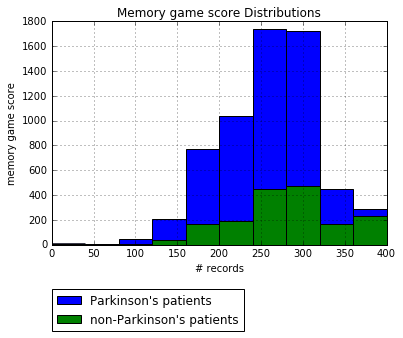

In [8]:
# plot the scores in Parkinsons and non-Parkinsons buckets
dPark.game_score.hist(label="Parkinson's patients")
dNon.game_score.hist(label="non-Parkinson's patients")
plt.title("Memory game score Distributions")
plt.ylabel('memory game score')
plt.xlabel('# records')
plt.legend(bbox_to_anchor=(0, -.2), loc=2, borderaxespad=0.)

print "Parkinson's and non-Parkinson's patients don't have very different scores-"
print "Probably need better metrics."
pass


### Look at how phones affect scores:

Phone type might affect the output..


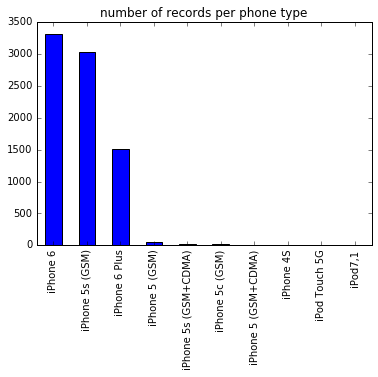

In [9]:
# look at how phone info affects results:
# (for parkinson's patients, &non?):

set(data.phoneInfo)
fig, ax = plt.subplots()
data.phoneInfo.value_counts().plot(ax=ax,kind='bar')
print('Phone type might affect the output..')
plt.title('number of records per phone type')
pass


In [10]:
# Filter out all but the most popular 3 phones:
#d2 = data[]
numuserscutoff = 1000
phonegroups = data.groupby('phoneInfo').size() 
goodphones = phonegroups[phonegroups > numuserscutoff].index
data = data[data.phoneInfo.isin(goodphones)]
print "(phones are now filtered for only the most popular ones)"

(phones are now filtered for only the most popular ones)


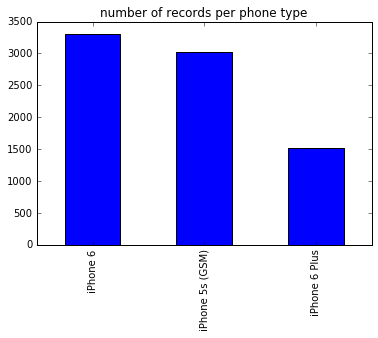

In [11]:
# Redo plot of how phone info affects results:
# (for parkinson's patients, &non?):

set(data.phoneInfo)
fig, ax = plt.subplots()
data.phoneInfo.value_counts().plot(ax=ax,kind='bar')

plt.title('number of records per phone type')
pass

Phone type might affect the output, since the screens are different sizes..

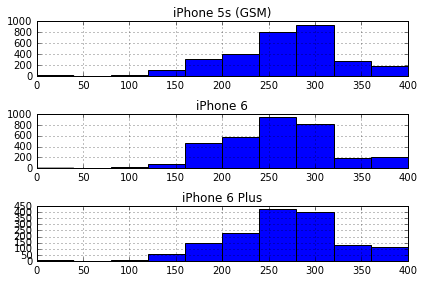

In [12]:
# todo check if the scores are different, within parkinson's category, for phone type!
#byphonePark = data[data.hasParkinsons==True].groupby('phoneInfo')
#byphonenonPark = data[data.hasParkinsons==False].groupby('phoneInfo')
byphone = data.groupby('phoneInfo')

numphones = len(byphone)
allphones = byphone.phoneInfo.unique()
for n, phone in enumerate(allphones):
    plt.subplot(len(allphones),1,n+1)
    data.game_score[byphone.groups[phone[0]]].hist()
    plt.title(phone[0])

plt.tight_layout()

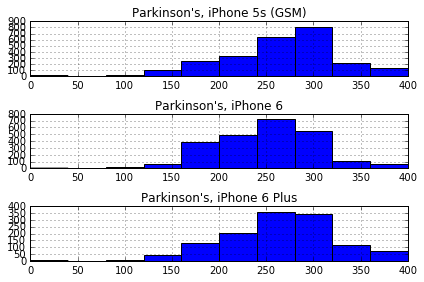

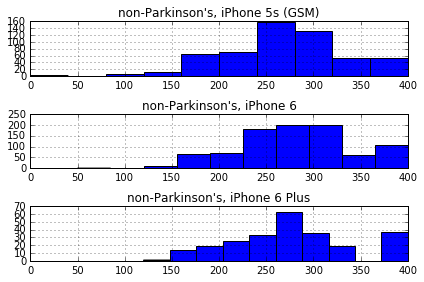

In [13]:
# compare these for parkinson's and non-parkinson's
# do on same plot too

# todo check if the scores are different, within parkinson's category, for phone type!
byphonePark = data[data.hasParkinsons==True].groupby('phoneInfo')
byphonenonPark = data[data.hasParkinsons==False].groupby('phoneInfo')

grouped = byphonePark
plt.figure()
numphones = len(grouped)
allphones = grouped.phoneInfo.unique()
for n, phone in enumerate(allphones):
    plt.subplot(len(allphones),1,n+1)
    data.game_score[grouped.groups[phone[0]]].hist()
    plt.title("Parkinson's, %s" % phone[0])
plt.tight_layout()

grouped = byphonenonPark
plt.figure()
numphones = len(grouped)
allphones = grouped.phoneInfo.unique()
for n, phone in enumerate(allphones):
    a = plt.subplot(len(allphones),1,n+1)
    data.game_score[grouped.groups[phone[0]]].hist()
    plt.title("non-Parkinson's, %s" % phone[0])
    a.set_xlim([0,400])
plt.tight_layout()


In [93]:
# do anova between these phone groups (are they different?)
dp1 = data[data['phoneInfo']=='iPhone 5s (GSM)']['game_score']
dp2 = data[data['phoneInfo']=='iPhone 6']['game_score']
dp3 = data[data['phoneInfo']=='iPhone 6 Plus']['game_score']

dPark = data[data['hasParkinsons']==True]['game_score']
dnPark = data[data['hasParkinsons']==False]['game_score']

# compute one-way ANOVA P value   
from scipy import stats
f1, p1 = stats.f_oneway(dp1, dp2, dp3) 

f2, p2 = stats.f_oneway(dPark, dnPark) 
  
print 'Results of anova''s:'
print 'Pval, score differences by phone: %s' % p1
print 'Pval, score differences, Parkinson''s vs. non: %s' % p2



Results of anovas:
Pval, score differences by phone: 1.60296203631e-09
Pval, score differences, Parkinsons vs. non: 2.80159738136e-35


#### Conclusion so far:
There is not a very convincing signal in the game scores between Parkinson's and non-Parkinson's patients, although there is some. There is also a significant signal separating peoples' scores by which phone they use.. 


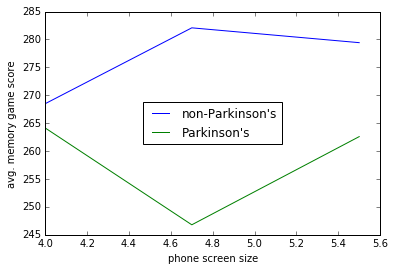

In [16]:
# compare scores to phone sizes:
phones = ['iPhone 5s (GSM)', 'iPhone 6', 'iPhone 6 Plus']
psizes = [4.0, 4.7, 5.5]

pstatus = data['hasParkinsons']==True
dp1P = data[(data['phoneInfo']==phones[0]) & (pstatus)]['game_score']
dp2P = data[(data['phoneInfo']==phones[1]) & (pstatus)]['game_score']
dp3P = data[(data['phoneInfo']==phones[2]) & (pstatus)]['game_score']

pstatus = data['hasParkinsons']==False
dp1n = data[(data['phoneInfo']==phones[0]) & (pstatus)]['game_score']
dp2n = data[(data['phoneInfo']==phones[1]) & (pstatus)]['game_score']
dp3n = data[(data['phoneInfo']==phones[2]) & (pstatus)]['game_score']

plt.plot(psizes,[dp1n.mean(), dp2n.mean(), dp3n.mean()], label="non-Parkinson's")
plt.plot(psizes,[dp1P.mean(), dp2P.mean(), dp3P.mean()], label="Parkinson's")


plt.legend(loc='best')
plt.xlabel('phone screen size')
plt.ylabel('avg. memory game score')

plt.show()


In [76]:
# look at data per-patient
dpat = data.groupby(['healthCode'])['game_score']
a = dpat.count()
print "Here are the summary stats of # plays per player:"
a.describe()


Here are the summary stats of # plays per player:


count    847.000000
mean       9.272727
std       26.099374
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      310.000000
Name: game_score, dtype: float64

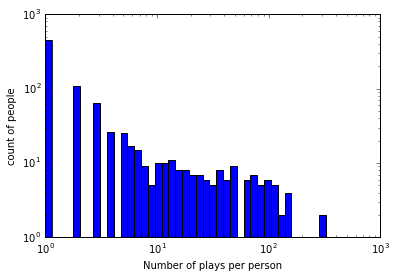

In [57]:
# look at data per-patient
dpat = data.groupby(['healthCode'])['game_score']

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#print ax
#ax.set_yscale('log')


#n, bins, patches = 
plt.hist(dpat.count(), bins=np.logspace(0, 3, 50), log=True )
plt.gca().set_xscale('log')
plt.xlabel('Number of plays per person')
plt.ylabel('count of people')
#plt.xlim([0, 200])

#plt.
#for key, grp in dpat:
#    plt.plot(grp, label=key)
#    numingroup len(grp)
#    print grp['game_score']
#    print key
#    print grp
    
#plt.show() 




In [ ]:
# number of plays per patient:

In [17]:
print 5

5


In [ ]:
# ? distribution of # records per Parkinson's and non-Parkinson's patient


In [95]:
from sklearn import linear_model
import sklearn.linear_model
import sklearn.cross_validation
import numpy as np
from sklearn.utils.validation import check_consistent_length, _num_samples

features = ['game_score','game_numGames'] # cannot have just 1 feature
X = data[features]

Y = data['hasParkinsons'].astype('int')

logr = linear_model.LogisticRegression()

logr.fit( X , Y )


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
print logr.coef_


[[-0.00576907  0.5453446 ]]


In [44]:


# todo check if the scores are different, within parkinson's category, for phone type!
byphonePark = data[data.hasParkinsons==True].groupby('phoneInfo')
byphonenonPark = data[data.hasParkinsons==False].groupby('phoneInfo')


In [176]:
grouped = data.groupby('phoneInfo')


In [175]:
grouped.describe()

age     createdOn  createdOn_demographic  \
phoneInfo                                                                     
iPhone 4S           count     9.000000  9.000000e+00           9.000000e+00   
                    mean     66.444444  1.441555e+12           1.438221e+12   
                    std       0.527046  1.412197e+08           2.984945e+09   
                    min      66.000000  1.441347e+12           1.435704e+12   
                    25%      66.000000  1.441448e+12           1.435704e+12   
                    50%      66.000000  1.441587e+12           1.435704e+12   
                    75%      67.000000  1.441618e+12           1.441367e+12   
                    max      67.000000  1.441782e+12           1.441367e+12   
iPhone 5 (GSM)      count    54.000000  5.400000e+01           5.400000e+01   
                    mean     68.018519  1.441525e+12           1.426799e+12   
                    std       8.378974  2.038021e+08           2.489215e+09   
                    min      20.000000  1.441166e+12           1.426025e+12   
                    25%      70.000000  1.441379e+12           1.426111e+12   
                    50%      70.000000  1.441611e+12           1.426258e+12   
                    75%      70.000000  1.441663e+12           1.426258e+12   
                    max      77.000000  1.441842e+12           1.441841e+12   
iPhone 5 (GSM+CDMA) count    10.000000  1.000000e+01           1.000000e+01   
                    mean     64.800000  1.441559e+12           1.432170e+12   
                    std       8.991354  2.199649e+08           7.576582e+09   
                    min      47.000000  1.441209e+12           1.426029e+12   
                    25%      61.000000  1.441433e+12           1.426357e+12   
                    50%      61.000000  1.441619e+12           1.426357e+12   
                    75%      74.000000  1.441729e+12           1.440973e+12   
                    max      74.000000  1.441832e+12           1.440973e+12   
iPhone 5c (GSM)     count    24.000000  2.400000e+01           2.400000e+01   
                    mean     62.583333  1.441530e+12           1.434926e+12   
                    std       7.643791  1.881797e+08           6.708019e+09   
                    min      43.000000  1.441226e+12           1.426183e+12   
                    25%      61.000000  1.441391e+12           1.426183e+12   
                    50%      62.000000  1.441519e+12           1.438698e+12   
...                                ...           ...                    ...   
iPhone 6            std      14.592403  3.557042e+09           4.412280e+09   
                    min      18.000000  1.429654e+12           1.425929e+12   
                    25%      59.000000  1.431379e+12           1.426026e+12   
                    50%      68.000000  1.434330e+12           1.428064e+12   
                    75%      70.000000  1.437664e+12           1.433350e+12   
                    max      90.000000  1.441831e+12           1.441831e+12   
iPhone 6 Plus       count  1504.000000  1.517000e+03           1.517000e+03   
                    mean     60.308511  1.433826e+12           1.428831e+12   
                    std      11.933305  3.435155e+09           3.594705e+09   
                    min      18.000000  1.429653e+12           1.425930e+12   
                    25%      56.000000  1.430875e+12           1.425994e+12   
                    50%      63.000000  1.433079e+12           1.426987e+12   
                    75%      69.000000  1.436231e+12           1.430752e+12   
                    max      83.000000  1.441838e+12           1.441662e+12   
iPod Touch 5G       count     4.000000  4.000000e+00           4.000000e+00   
                    mean     63.500000  1.441565e+12           1.426849e+12   
                    std       7.000000  1.593025e+08           1.811788e+09   
                    min      60.000000  1.441399e+12           1.425943e+12   
      

In [179]:
grouped.agg({'game_score':'mean'})




,game_score
phoneInfo,
iPhone 4S,261.111111
iPhone 5 (GSM),306.666667
iPhone 5 (GSM+CDMA),217.000000
iPhone 5c (GSM),238.750000
iPhone 5s (GSM),264.919115
iPhone 5s (GSM+CDMA),293.125000
iPhone 6,256.364873
iPhone 6 Plus,265.336190
iPod Touch 5G,256.250000


In [180]:
data.head(3)

,recordId,healthCode,createdOn,appVersion,phoneInfo,game_score,game_numGames,game_numFails,game_startDate,game_endDate,...,pastParticipation,phoneUsage,professionalDiagnosis,race,smartphone,smoked,surgery,videoUsage,yearsSmoking,hasParkinsons
0,5a0b4204-8a6c-430f-be93-c5aa2d6c9e33,46f5740b-afa0-4432-94a4-4155ae963b75,1429652895000,"version 1.0.5, build 12",iPhone 6 Plus,400,5,0,1429652844000,1429652895000,...,False,true,False,"""Latino/Hispanic""",Very easy,False,False,True,NaN,False
1,0d313fd2-d798-4d09-8c21-b632c5ef454b,46f5740b-afa0-4432-94a4-4155ae963b75,1429912465000,"version 1.0.5, build 12",iPhone 6 Plus,285,5,1,1429912375000,1429912465000,...,False,true,False,"""Latino/Hispanic""",Very easy,False,False,True,NaN,False
2,4cfc9a04-9956-410c-a2e8-592b565aa305,64aedea6-b1f9-49da-8b10-3f02d8ed04b6,1429653765000,"version 1.0.5, build 12",iPhone 6,260,5,1,1429653708000,1429653765000,...,False,true,False,"""White or Caucasian""",Very easy,False,False,True,NaN,False


In [181]:
data.pivot_table(columns='phoneInfo')

phoneInfo,iPhone 4S,iPhone 5 (GSM),iPhone 5 (GSM+CDMA),iPhone 5c (GSM),iPhone 5s (GSM),iPhone 5s (GSM+CDMA),iPhone 6,iPhone 6 Plus,iPod Touch 5G,"iPod7,1"
age,6.644444e+01,6.801852e+01,6.480000e+01,6.258333e+01,6.172127e+01,3.491667e+01,6.199214e+01,6.030851e+01,6.350000e+01,5.800000e+01
createdOn,1.441555e+12,1.441525e+12,1.441559e+12,1.441530e+12,1.434684e+12,1.434632e+12,1.434748e+12,1.433826e+12,1.441565e+12,1.438021e+12
createdOn_demographic,1.438221e+12,1.426799e+12,1.432170e+12,1.434926e+12,1.428841e+12,1.433498e+12,1.429952e+12,1.428831e+12,1.426849e+12,1.437918e+12
diagYear,2.011111e+03,2.009708e+03,2.007400e+03,2.007208e+03,2.011683e+03,2.014000e+03,2.010242e+03,2.009544e+03,2.011500e+03,2.012000e+03
game_endDate,1.441555e+12,1.441525e+12,1.441559e+12,1.441530e+12,1.434684e+12,1.434632e+12,1.434748e+12,1.433826e+12,1.441565e+12,1.438021e+12
game_numFails,1.222222e+00,1.018519e+00,1.800000e+00,1.541667e+00,1.312644e+00,1.000000e+00,1.364571e+00,1.282136e+00,1.250000e+00,1.500000e+00
game_numGames,5.000000e+00,5.000000e+00,4.900000e+00,5.000000e+00,4.997029e+00,5.000000e+00,4.996070e+00,4.997363e+00,5.000000e+00,5.000000e+00
game_records,6.086385e+06,6.085755e+06,6.086640e+06,6.086366e+06,5.640585e+06,5.623280e+06,5.636195e+06,5.641218e+06,6.087078e+06,5.630180e+06
game_score,2.611111e+02,3.066667e+02,2.170000e+02,2.387500e+02,2.649191e+02,2.931250e+02,2.563649e+02,2.653362e+02,2.562500e+02,2.900000e+02
game_startDate,1.441555e+12,1.441524e+12,1.441559e+12,1.441530e+12,1.434683e+12,1.434631e+12,1.434748e+12,1.433826e+12,1.441565e+12,1.438021e+12


In [177]:
grouped.sum()





,createdOn,game_score,game_numGames,game_numFails,game_startDate,game_endDate,game_records,createdOn_demographic,age,diagYear,lastSmoked,medicationStartYear,onsetYear,packsPerDay,yearsSmoking,hasParkinsons
phoneInfo,,,,,,,,,,,,,,,,
iPhone 4S,12973997032000,2350,45,11,12973996394000,12973996950000,54777467,12943988975000,598,18100,9915,18130,18088,5,75,9
iPhone 5 (GSM),77842324329000,16560,270,55,77842320710000,77842324153000,328630780,77047131796000,3673,96466,65215,88406,106499,33,217,48
iPhone 5 (GSM+CDMA),14415588948000,2170,49,18,14415588320000,14415588898000,60866397,14321704836000,648,20074,7900,18062,20064,4,48,10
iPhone 5c (GSM),34596730750000,5730,120,37,34596729223000,34596730678000,146072783,34438233508000,1502,48173,25960,46172,48040,13,307,24
iPhone 5s (GSM),4345656464767000,802440,15136,3976,4345656257976000,4345656464483000,17085332023,4327960835677000,186892,4995009,2115257,4432639,5008728,1270,13802,2483
iPhone 5s (GSM+CDMA),34431156301000,7035,120,24,34431155022000,34431156301000,134958708,34403953320000,838,4028,4005,2015,4029,1,14,2
iPhone 6,4746147732850000,848055,16527,4514,4746147513717000,4746147732591000,18644534434,4730280302328000,205008,4846693,1747704,4498022,5344607,772,11704,2411
iPhone 6 Plus,2175114785124000,402515,7581,1945,2175114687377000,2175114784995000,8557728322,2167537258451000,90704,2487815,690199,2458601,2584536,358,2184,1270
iPod Touch 5G,5766261824000,1025,20,5,5766261547000,5766261806000,24348313,5707396451000,254,8046,5934,8047,8023,NaN,9,4


In [170]:
# todo check if the scores are different, within parkinson's category, for phone type!
byphonePark = data[data.hasParkinsons==True].groupby('phoneInfo')
byphonenonPark = data[data.hasParkinsons==False].groupby('phoneInfo')

        
#phones = ['iPhone 6', 'iPhone 5s (GSM)', 'iPhone 6 Plus']
## phones_unique = byphonePark.phoneInfo.unique()
#ax = {}
#
#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
#
#for phone in phones:
#    ax[phone].hist(byphonePark.game_score, label=phone)
#    


#allphones = byphonePark.phoneInfo.unique()
allphones = ['iPhone 6']
for phone in allphones:
#    print phone
    temp = byphonePark[byphonePark.phoneInfo==phone]
    
#    temp = byphonePark[byphonePark.phoneInfo==phone]
    
#    plt.hist(temp.game_score, label=phone)    
#plt.legend()
#plt.show()
                       
                       
                       
#for phone in phones_of_interest:
#    temp = byphonePark[byphonePark.phoneInfo==phone]
#    plt.hist(temp.game_score, label=phone)
#    
#plt.legend()
#plt.show()



## look up subplots


#for phonetype, phonedata in byphonePark:
#    phonedata.game_score.hist(label=phonetype)
#    print phonedata.game_score
    
#    plt.hist(phonedata.game_score, label = phonetype)
#plt.legend()
#plt.show()

#for ind, phonetype in enumerate(byphonePark):
#    plt
#    d = 
#    plt.plot()
#
#    datacurr.game_score.hist()

    
    
#data[data.hasParkinsons==True].game_score.hist(label="Parkinson's patients")
#data[data.hasParkinsons==False].game_score.hist(label="non-Parkinson's patients")
#
#plt.title("Memory game score Distributions")
#plt.ylabel('memory game score')
#plt.xlabel('# records')
#plt.legend(bbox_to_anchor=(0, -.2), loc=2, borderaxespad=0.)

#pass

In [45]:
byphonePark.groups







{'iPhone 5s (GSM)': [131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  245,
  246,
  247,
  248,
  249,
  250,
  251,
  252,
  253,
  254,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268,
  269,
  270,
  271,
  272,
  273,
  274,
  275,
  276,
  277,
  278,
  279,
  280,
  281,
  282,
  283,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  292,
  293,
  294,
  295,
  296,
  297,
  298,
 

In [ ]:
# look at, per patient, the records w/ different 'when took medicine' stats

In [36]:
# game_scores for Parkinson's vs non

for m in med_timepoint: 
    print m
    
doctor diagnosis & diagnosis year

for     diagYear   
    professionalDiagnosis
    
    
    

nan
I don't take Parkinson medications
Immediately before Parkinson medication
Another time
Just after Parkinson medication (at your best)


### Split into Parkinson's patients and non-patients

In [29]:
# the definitely parkinson's ones will have 
data.columns

memory[col_name] = data.events.apply(lambda e: event_kind in e)
   

Index([        u'recordId',       u'healthCode',        u'createdOn',
             u'appVersion',        u'phoneInfo',       u'game_score',
          u'game_numGames',    u'game_numFails',   u'game_startDate',
           u'game_endDate',     u'game_records',     u'medTimepoint',
       u'game_records_txt'],
      dtype='object')

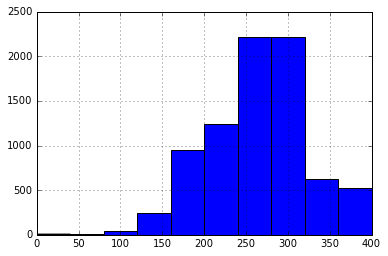

In [30]:
memory.game_score.hist()